# Video Game Sales EDA and Prediction

## TTS Final Project by Kalel Lopez

In this project I will be using a dataset containing more than 16,000 video game entries, running an analysis over the data, and attempt to predict sales using various regressions and features such as genre, reviews, and user scores.

### 1. Imports and Downloads

In [48]:
! pip install xgboost

In [49]:
# Data Manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Scikit functions and Regressors
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Importing the dataset
dataset = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')

dataset.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Exploratory Data Analysis

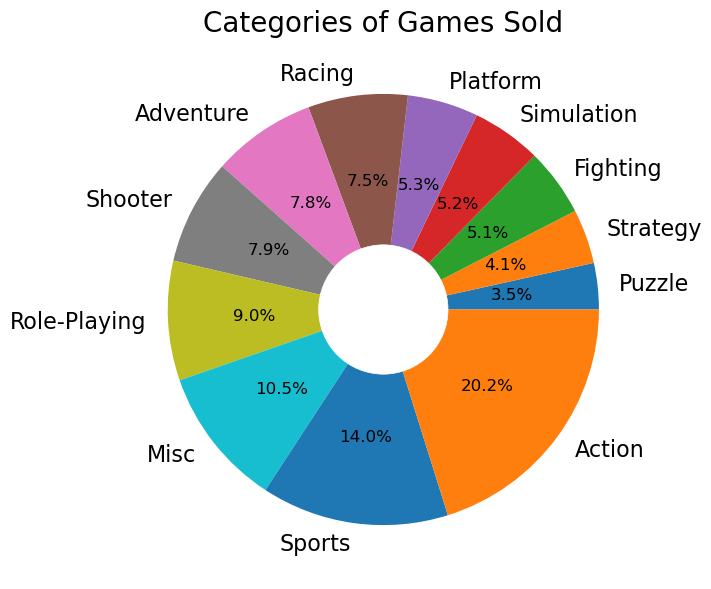

In [50]:
# here we groupby the genre and get the total number of sales globally
game = dataset.groupby("Genre")["Global_Sales"].count().sort_values()

# plotting
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, autopct='%1.1f%%')
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Categories of Games Sold", fontsize=20)
plt.show()

Let's take a closer look at the top genres of games.

Genre
Action          1745.27
Sports          1332.00
Shooter         1052.94
Role-Playing     934.40
Platform         828.08
Misc             803.18
Racing           728.90
Fighting         447.48
Simulation       390.42
Puzzle           243.02
Adventure        237.69
Strategy         174.50
Name: Global_Sales, dtype: float64


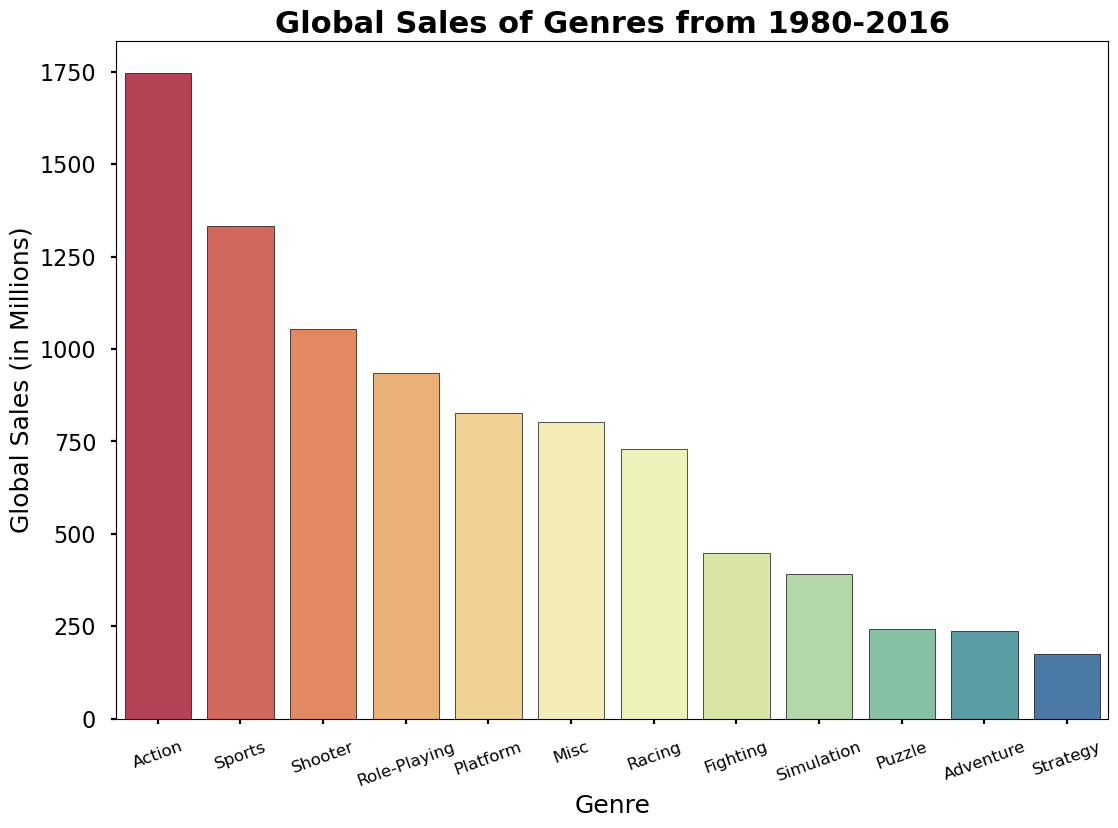

In [51]:
style.use('seaborn-poster')
# group by genre and get global sales again, this time sorted for easier graphing
genre_global_sales = dataset.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

print(genre_global_sales)

sns.barplot(x=genre_global_sales.index, y=genre_global_sales.values, ec='Black', palette='Spectral')
plt.xticks(rotation=20, fontsize=12)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Global Sales (in Millions)', fontsize=18)
plt.title('Global Sales of Genres from 1980-2016', fontweight='bold', fontsize=22)

plt.show()

It seems obvious that the "Action" genre is the most common type of video game. However, this may not be entirely indicative of popularity since there is a lot of overlap in genre between the first 4 entries in the graph. Sports, Shooter, and Role-Playing games can all be potentially classified as action games as well, depending on the contents of the game.

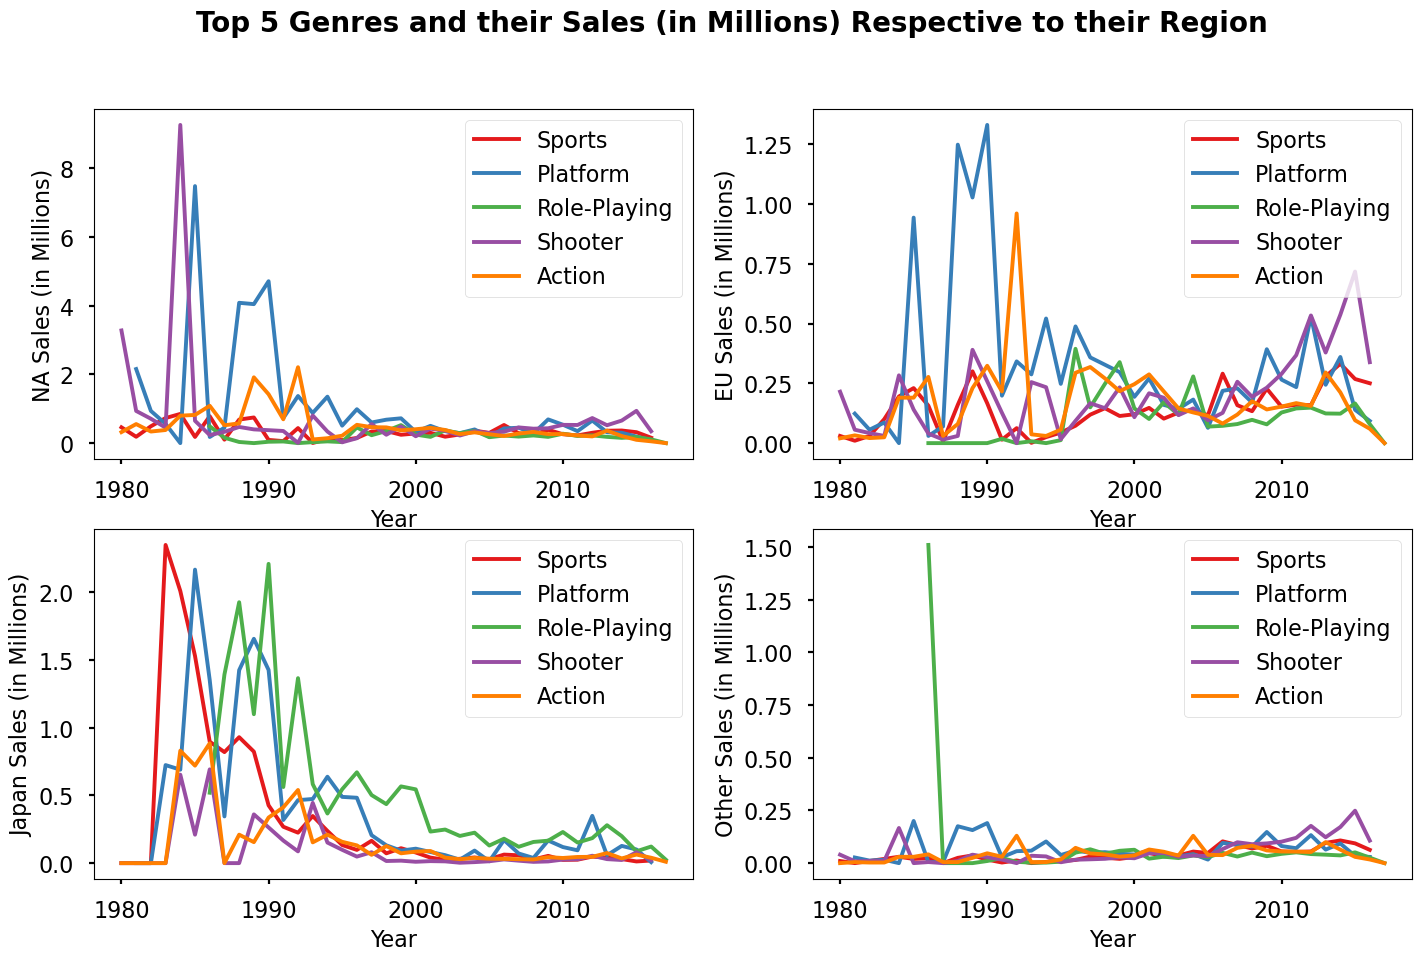

In [52]:
top5_genres_list = dataset.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index

top5_genre_df = dataset[dataset.Genre.isin(top5_genres_list)]
fig, (ax0,ax1) = plt.subplots(2,2, figsize=(17,10))

fig.suptitle('Top 5 Genres and their Sales (in Millions) Respective to their Region', fontsize=20, fontweight = 'bold')

sns.lineplot(x='Year_of_Release', y='NA_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax0[0], palette='Set1')

sns.lineplot(x='Year_of_Release', y='EU_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax0[1], palette='Set1')

sns.lineplot(x='Year_of_Release', y='JP_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1[0], palette='Set1')

sns.lineplot(x='Year_of_Release', y='Other_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1[1], palette='Set1')

ax0[0].legend(loc='upper right')
ax0[1].legend(loc='upper right')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')

#ax1[1].set_ylim(-0.1,1.6)

ax0[0].set_ylabel('NA Sales (in Millions)', fontsize=16)
ax0[1].set_ylabel('EU Sales (in Millions)', fontsize=16)
ax1[0].set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax1[1].set_ylabel('Other Sales (in Millions)', fontsize=16)

ax0[0].set_xlabel('Year', fontsize=16)
ax0[1].set_xlabel('Year', fontsize=16)
ax1[0].set_xlabel('Year', fontsize=16)
ax1[1].set_xlabel('Year', fontsize=16)


plt.show()

As we can see, shooter games were most popular in North America in the 1980s and are still the most popular genre as of 2016. In Europe, platforming games were most popular, but shooter games are more popular in recent years. This makes sense because many AAA western game developers publish First-Person Shooter games. AAA or triple-A is an informal classification used to categorise video games produced and distributed by a mid-sized or major publisher.  \
Japan has the most balanced mix of genres with role-playing and platforming standing out from the rest in recent years. It is easy to understand why this is so as Japan is the home of large names such as Nintendo, Capcom, and Sega. Furthermore, in Japan there is a subgenre of Role-Playing games called J-RPGs, which were especially popular around 1990.  \
The cause for the spike in RPGs in Other Regions is likely due to some miss values in the Year_of_Release.

### 3. Predictions with various Regressions

In [53]:
print(dataset.shape)

# To view the columns with missing values
print('Feature name || Total missing values')
print(dataset.isna().sum())

(16719, 16)
Feature name || Total missing values
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [54]:
# Dropping certain less important features
dataset.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)

In [86]:
# new dataset with only important features
print('Feature name || Total missing values')
print(dataset.isna().sum())

Feature name || Total missing values
Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Rating          6769
dtype: int64


Here we are going to assign the training and testing variables. All independent variables get assigned to 'X' and the target values are assigned to 'y'. We will also store the names of the games in separate lists so as to match the value with the name later. This also helps the model not get confused with this categorical information.

In [55]:
X = dataset.iloc[:, :].values #Independent variable
X = np.delete(X, 6, 1) #Remove Global Sales before splitting into training and testing
y = dataset.iloc[:, 6:7].values #target values

# Splitting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Saving name of the games in training and test set
games_in_training_set = X_train[:, 0]
games_in_test_set = X_test[:, 0]

# Dropping the column that contains the name of the games
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

We will be using an Imputer to replace any missing data with some substitued values. All quantitative values that are missing will simply be replaced by the mean value of the column. All categorical values that are missing will be replaced with 'NA'.

In [56]:
imputer = SimpleImputer(strategy = 'mean') #takes mean of column
X_train[:, [5 ,6, 7, 8]] = imputer.fit_transform(X_train[:, [5, 6, 7, 8]])
X_test[:, [5 ,6, 7, 8]] = imputer.transform(X_test[:, [5, 6, 7, 8]])

categorical_imputer = SimpleImputer(strategy = 'constant', fill_value = 'NA')
X_train[:, [0, 9]] = categorical_imputer.fit_transform(X_train[:, [0, 9]])
X_test[:, [0, 9]] = categorical_imputer.transform(X_test[:, [0, 9]])

Now we will encode the categorical columns so there is no confusion. The ColumnTransformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. The OneHotEncoder encodes categorical features as a one-hot (aka ‘one-of-K’ or ‘dummy’) numeric array. By default, the encoder derives the categories based on the unique values in each feature.

In [57]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough') 
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

Now we can begin predicting values using different methods. I decided to test 3 different models to find the most accurate one.

### 3.1 Lasso Regression

The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable.

In [58]:
from sklearn.linear_model import Lasso

#fit model
model2 = Lasso()
model2.fit(X_train, y_train)

#predict test results
guess = model2.predict(X_test)

In [61]:
games_in_test_set = games_in_test_set.reshape(-1, 1)
guess = guess.reshape(-1, 1)

# Visualising actual and predicted sales
predict = np.concatenate([games_in_test_set, guess, y_test], axis = 1)
predict = pd.DataFrame(predict, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])
predict.head(10)

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.799296,0.19
1,The Terminator: Dawn of Fate,0.252408,0.41
2,Dead to Rights: Retribution,0.610016,0.28
3,Skylanders SWAP Force,0.666278,2.15
4,DiRT,0.602785,1.05
5,Robotics;Notes,0.477562,0.02
6,Combat Wings: The Great Battles of WWII,0.482062,0.03
7,Nicola Kanshuu: Model Oshare * Audition Platina,0.477562,0.08
8,Lego Batman 3: Beyond Gotham,0.409026,0.3
9,SpongeBob SquarePants: Battle for Bikini Bottom,0.45681,1.67


In [62]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2_1 = r2_score(y_test, guess)
rmse3 = math.sqrt(mean_squared_error(y_test, guess))
print(f"r2 score of the model : {r2_1:.4f}")
print(f"Root Mean Squared Error of the model : {rmse3:.4f}")

r2 score of the model : 0.3118
Root Mean Squared Error of the model : 1.1911


As we can see, a lasso regression on this dataset did not yield any good results. the R2 score of the model is far from 1 and the RMSE is not good. Let's try a different method:

### 3.2 XGB Regression

This model will be built with XGB Regressor. The package XGBoost (Extreme Gradient Boost) is an efficient open-source implementation of the gradient boosting algorithm. Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensemble algorithms effectively combine weak learners to produce a strong learner.

In [82]:
model = XGBRegressor(n_estimators = 50)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [83]:
# Predicting test set results
y_pred = model.predict(X_test)

# Visualising actual and predicted sales
y_pred = y_pred.reshape(-1, 1)
predictions = np.concatenate([games_in_test_set, y_pred, y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])

In [84]:
predictions.head(10)

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.189178,0.19
1,The Terminator: Dawn of Fate,0.436778,0.41
2,Dead to Rights: Retribution,0.296783,0.28
3,Skylanders SWAP Force,2.202353,2.15
4,DiRT,1.161131,1.05
5,Robotics;Notes,0.020163,0.02
6,Combat Wings: The Great Battles of WWII,0.025549,0.03
7,Nicola Kanshuu: Model Oshare * Audition Platina,0.071996,0.08
8,Lego Batman 3: Beyond Gotham,0.326616,0.3
9,SpongeBob SquarePants: Battle for Bikini Bottom,1.67244,1.67


In [85]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.980
Root Mean Squared Error of the model : 0.204


This model is much more accurate with an R2 score of nearly 1 and an RMSE of only 0.2. Normally, this is all we would need to have a good prediction model, but can this score be improved?

### 3.3 Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. Regression models a target prediction value based on independent variables.
Linear regression is defined as the process of determining the straight line that best fits a set of dispersed data points: The line can then be projected to forecast fresh data points.

In [67]:
# fit model
model1 = LinearRegression()
model1.fit(X_train, y_train)

#predict on test set
pred = model1.predict(X_test)

In [68]:
pred = pred.reshape(-1, 1)

# Visualising actual and predicted sales
prediction = np.concatenate([games_in_test_set, pred, y_test], axis = 1)
prediction = pd.DataFrame(prediction, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])
prediction.head(10)

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.180317,0.19
1,The Terminator: Dawn of Fate,0.4106,0.41
2,Dead to Rights: Retribution,0.290356,0.28
3,Skylanders SWAP Force,2.150261,2.15
4,DiRT,1.050121,1.05
5,Robotics;Notes,0.020145,0.02
6,Combat Wings: The Great Battles of WWII,0.020334,0.03
7,Nicola Kanshuu: Model Oshare * Audition Platina,0.080445,0.08
8,Lego Batman 3: Beyond Gotham,0.310204,0.3
9,SpongeBob SquarePants: Battle for Bikini Bottom,1.67037,1.67


In [69]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2 = r2_score(y_test, pred)
rmse2 = math.sqrt(mean_squared_error(y_test, pred))
print(f"r2 score of the model : {r2:.4f}")
print(f"Root Mean Squared Error of the model : {rmse2:.4f}")

r2 score of the model : 1.0000
Root Mean Squared Error of the model : 0.0052


Now these are incredible results. This means our model is incredibly accurate. We have successfully predicted the global sales of a video game depending on features such as its genre, critic reviews, and user score.

### 4. Acknowledgements

1. https://www.codespeedy.com/predicting-video-game-sales-using-machine-learning-in-python/  \
2. https://www.kaggle.com/code/jbofill/video-game-eda-and-predictive-modeling  \
3. https://thecleverprogrammer.com/2021/05/28/video-game-sales-prediction-model-with-python/